In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,DepthwiseConv2D,SeparableConv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [2]:

from tensorflow import keras
keras.__version__

'2.5.0'

In [3]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [4]:
train=r"Z:\mask detection\Mask Dataset"
valid=r"Z:\mask detection\valid"


In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train,
                                                    batch_size=10,color_mode='grayscale' ,
                                                    target_size=(150, 150))

Found 1200 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [7]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(valid, 
                                                         batch_size=10, color_mode='grayscale' ,
                                                         target_size=(150, 150))

Found 352 images belonging to 2 classes.


In [8]:
list(validation_generator.class_indices)

['with_mask', 'without_mask']

In [9]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)


c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
model = Sequential([
    SeparableConv2D(100, (3,3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    SeparableConv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Flatten(),
    Dropout(0.4),
    Dense(150, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 148, 148, 100)     209       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 74, 100)       400       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 72, 72, 100)       11000     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 100)       400       
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0

In [12]:
history = model.fit_generator(train_generator,
                              epochs=EPOCHS,
                              validation_data=validation_generator)

c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
120/120 [==============================] - 59s 470ms/step - loss: 1.3557 - acc: 0.7592 - val_loss: 0.7802 - val_acc: 0.4886
Epoch 2/20
120/120 [==============================] - 52s 433ms/step - loss: 0.7742 - acc: 0.8058 - val_loss: 0.9055 - val_acc: 0.4886
Epoch 3/20
120/120 [==============================] - 52s 432ms/step - loss: 0.5402 - acc: 0.8383 - val_loss: 0.8514 - val_acc: 0.4886
Epoch 4/20
120/120 [==============================] - 52s 436ms/step - loss: 0.4166 - acc: 0.8567 - val_loss: 1.1348 - val_acc: 0.4886
Epoch 5/20
120/120 [==============================] - 51s 429ms/step - loss: 0.3367 - acc: 0.8808 - val_loss: 0.5944 - val_acc: 0.7216
Epoch 6/20
120/120 [==============================] - 51s 425ms/step - loss: 0.3716 - acc: 0.8708 - val_loss: 0.3587 - val_acc: 0.8693
Epoch 7/20
120/120 [==============================] - 51s 427ms/step - loss: 0.3110 - acc: 0.8900 - val_loss: 0.2905 - val_acc: 0.8864
Epoch 8/20
120/120 [==============================] - 5

import cv2
img=cv2.imread(r"Z:\mask detection\valid\with_mask\augmented_image_206 - Copy.jpg",0)
img=cv2.resize(img,(150,150))


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
lo=history.history['loss']
vlo=history.history['val_loss']

ax=history.history['acc']
vax=history.history['val_acc']

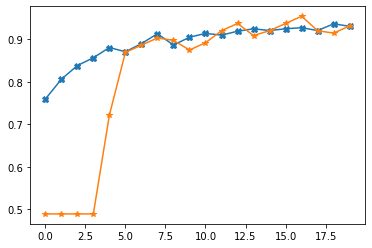

In [58]:
# plt.plot(lo)
# plt.plot(vlo)

plt.plot(ax,marker='X')
plt.plot(vax,marker='*')

In [18]:
from tensorflow.keras.models import save_model,load_model

In [19]:
sm=model.save('mask.HDF5')

INFO:tensorflow:Assets written to: mask.HDF5\assets


In [20]:
sl=load_model('mask.HDF5')

In [27]:
test=r"Z:\mask detection\test_set"

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test, 
                                                         batch_size=10, color_mode='grayscale' ,
                                                         target_size=(150, 150))

Found 5 images belonging to 1 classes.


In [28]:
loss,accu=sl.evaluate_generator(test_generator)

c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [30]:
loss

1.6782019138336182

In [78]:
pred=sl.predict_generator(test_generator)

c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [79]:
pred

array([[8.0809061e-04, 9.9919194e-01],
       [3.5872466e-03, 9.9641281e-01],
       [1.5941054e-01, 8.4058946e-01],
       [1.0262667e-02, 9.8973733e-01],
       [9.9995136e-01, 4.8666385e-05]], dtype=float32)

In [35]:
df=['with_mask', 'without_mask']

In [36]:
len(pred)

5

In [39]:
np.argmax(pred[1])

1

In [38]:
np.argmax(df)

1

In [116]:
img=load_img('tmm.jpg')
img=img_to_array(img)/255


import cv2
img=cv2.resize(img,(150,150))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=img.reshape(-1,img.shape[0],img.shape[1],1)

In [117]:
img.shape

(1, 150, 150, 1)

In [118]:
pp=sl.predict_proba(img)

In [119]:
pp

array([[9.9977118e-01, 2.2888697e-04]], dtype=float32)

In [120]:
df[np.argmax(pp)]

'with_mask'

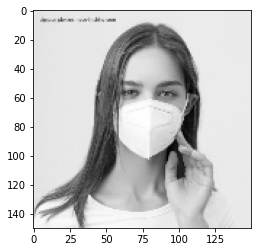

In [121]:
plt.imshow(img.reshape(150,150,1),cmap='gray')

In [122]:
df

['with_mask', 'without_mask']

In [124]:
from tensorflow.keras.utils import plot_model

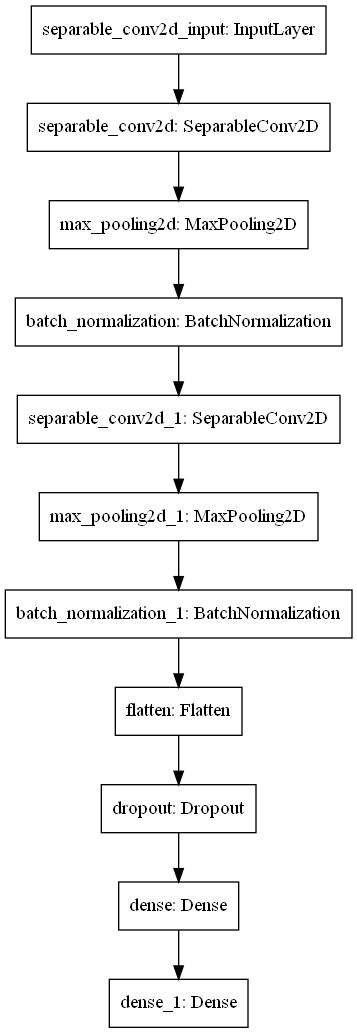

In [125]:
plot_model(model)

In [127]:
save_model(model,'mymodel.h5p')

INFO:tensorflow:Assets written to: mymodel.h5py\assets


In [ ]:
fd=load_model('mymodel.h5py')

In [1]:
import cv2


In [2]:
cv2.createTrackbar()

TypeError: function takes exactly 5 arguments (0 given)

In [3]:
alpha_slider_max = 100
title_window = 'Linear Blend'
def on_trackbar(val):
    alpha = val / alpha_slider_max
    beta = ( 1.0 - alpha )
    dst = cv.addWeighted(src1, alpha, src2, beta, 0.0)
    cv.imshow(title_window, dst)